# Exploratory Data Analysis

## In this notebook, the final data set is analysed. 

In [32]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
#load pickle
merged_df = pd.read_pickle('merged_data.pkl')

In [34]:
merged_df.sample(10)

,customer_id,time,event,offer_id,label,reward,difficulty,offer_duration_hrs,bogo,discount,...,became_member_on,income,F,M,N,O,income_group,age_group,offer_type,gender
11102,26ffde4f42334fe7b162f2186070fe53,408,offer received,2298d6c36e964ae4a3e7e9706d1fb8c2,1,3,7,168,0,1,...,1501632000000000000,101000.000000,1,0,0,0,3.0,2.0,discount,F
17646,3b899227f99e466a8d77b4d7519bde11,168,offer received,2906b810c7d4411798c6938adc9daaa5,1,2,10,168,0,1,...,1516147200000000000,83000.000000,0,1,0,0,2.0,2.0,discount,M
55579,b90fff218dad4f849c4fff20b4112c01,408,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,5,5,168,1,0,...,1518048000000000000,65404.991568,0,0,1,0,2.0,3.0,bogo,N
43822,92753745d26945beba2afe7aa2dc7593,336,offer received,2298d6c36e964ae4a3e7e9706d1fb8c2,0,3,7,168,0,1,...,1530576000000000000,65000.000000,1,0,0,0,2.0,1.0,discount,F
10404,24ade653d9a4485c89f31a8316367930,408,offer received,2906b810c7d4411798c6938adc9daaa5,0,2,10,168,0,1,...,1526342400000000000,84000.000000,0,1,0,0,2.0,2.0,discount,M
15264,34133498709c4f2b95af0cc334171602,336,offer received,3f207df678b143eea3cee63160fa8bed,0,0,0,96,0,0,...,1451347200000000000,98000.000000,1,0,0,0,3.0,2.0,informational,F
41354,8a7902df445a4c12933923a02d467928,336,offer received,3f207df678b143eea3cee63160fa8bed,2,0,0,96,0,0,...,1453939200000000000,53000.000000,0,1,0,0,1.0,2.0,informational,M
33358,7037aabfcf9a452796d3cb2e9805b0a0,168,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,5,20,240,0,1,...,1479427200000000000,63000.000000,0,1,0,0,2.0,2.0,discount,M
15725,35c863d477084f7fb46e4b309cf3ea5d,0,offer received,f19421c1d4aa40978ebb69ca19b0e20d,0,5,5,120,1,0,...,1410393600000000000,66000.000000,0,1,0,0,2.0,2.0,bogo,M
16610,38862b09048e4b1289d233f2b42dcfac,576,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10,10,120,1,0,...,1396396800000000000,71000.000000,1,0,0,0,2.0,2.0,bogo,F


## 1) Explore offer sent to various age groups

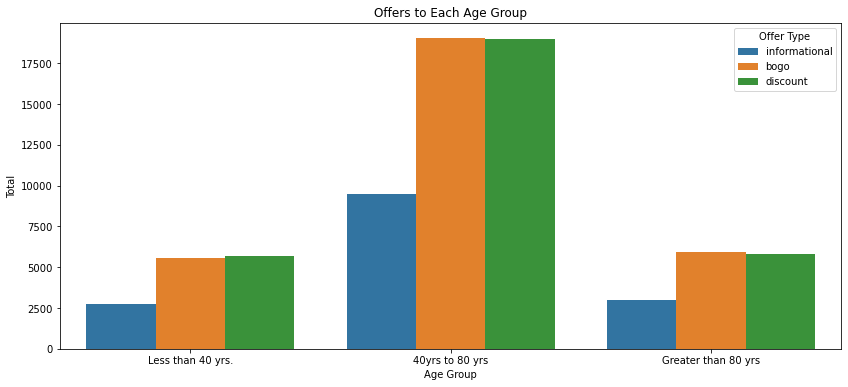

In [35]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="age_group", hue="offer_type", data=merged_df)
plt.title('Offers to Each Age Group')
plt.ylabel('Total')
plt.xlabel('Age Group')
xlabels = ['Less than 40 yrs.','40yrs to 80 yrs','Greater than 80 yrs']
g.set_xticklabels(xlabels)
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

### For all three age groups, BOGO and Discount are the most popular offer type.

## 2) Explore offer sent to various income groups

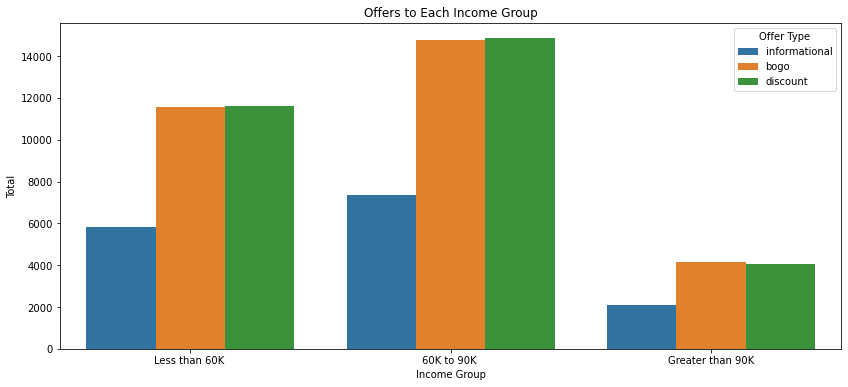

In [36]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="income_group", hue="offer_type", data=merged_df)
plt.title('Offers to Each Income Group')
plt.ylabel('Total')
plt.xlabel('Income Group')
xlabels = ['Less than 60K ','60K to 90K ','Greater than 90K']
g.set_xticklabels(xlabels)
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

### For all three income groups, BOGO and Discount are the most popular offer type.

## 3. Explore the income distributions between various age groups.

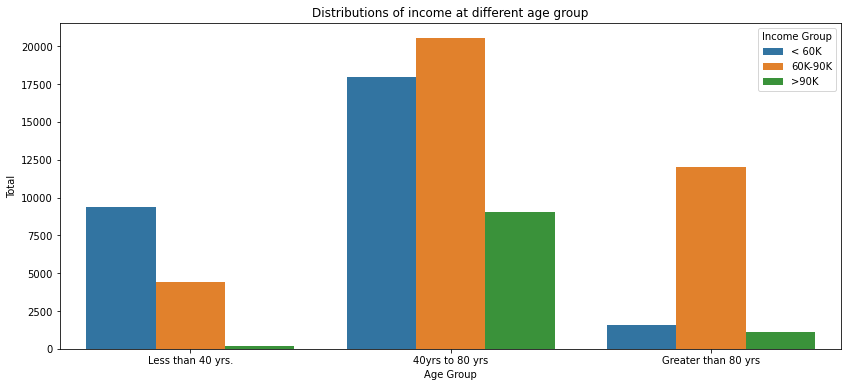

In [41]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="age_group", hue="income_group", data=merged_df)
plt.title('Distributions of income at different age group')
plt.ylabel('Total')
plt.xlabel('Age Group')
xlabels = ['Less than 40 yrs.','40yrs to 80 yrs','Greater than 80 yrs']
g.set_xticklabels(xlabels)
plt.xticks(rotation = 0)
plt.legend(title='Income Group', labels=['< 60K', '60K-90K','>90K'])
plt.show();

### Less than 40 years age group is dominated income less than 60K per year.
### Customer with the age group between 40 years and 80 years have income range between 60K and 90K, and less than 60K. There is also a significant number of customers with higher income range (>90K).
### Higher age customers (>80 years) have income range dominated by 60K-90K.


## 4. Explore the age group of different gender

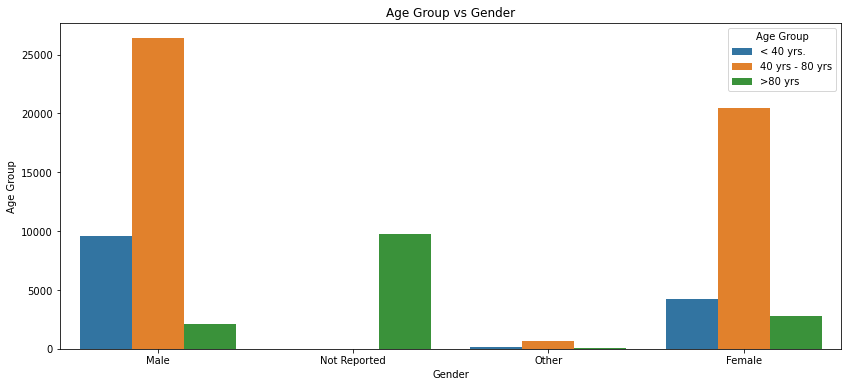

In [48]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="gender", hue="age_group", data= merged_df)
plt.title('Age Group vs Gender')
plt.ylabel('Age Group')
xlabels = ['Male', 'Not Reported','Other','Female']
g.set_xticklabels(xlabels)
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Age Group', labels=['< 40 yrs.', '40 yrs - 80 yrs','>80 yrs'])
plt.show();

 ### Gender reported as male, female and others  are identically distributed for different age groups. The dominant age group  seem to be 40 yrs. to 80 yrs. All the non reported genders have age > 80 years.

## 5. Explore the income group for different gender

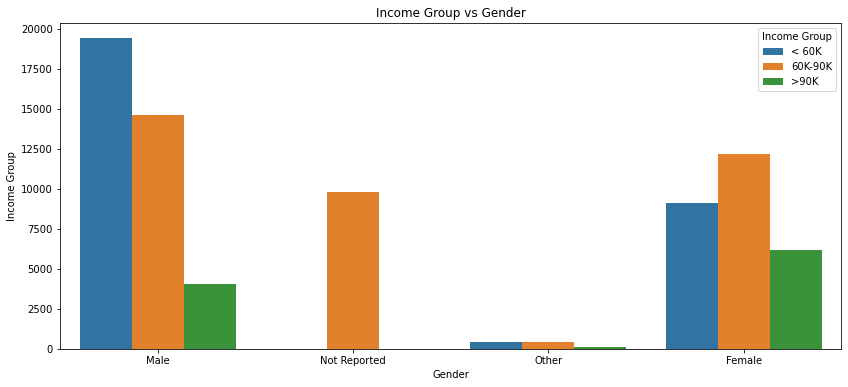

In [40]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="gender", hue="income_group", data= merged_df)
plt.title('Income Group vs Gender')
plt.ylabel('Income Group')
xlabels = ['Male', 'Not Reported','Other','Female']
g.set_xticklabels(xlabels)
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Income Group', labels=['< 60K', '60K-90K','>90K'])
plt.show();

### Customers with higher incomes (>90K) are mostly females and those with medium income (60K-90K) are male. Interestly, all the customers who didn't report their gender fall under medium income group>

## 6. Explore the offer type received by different gender

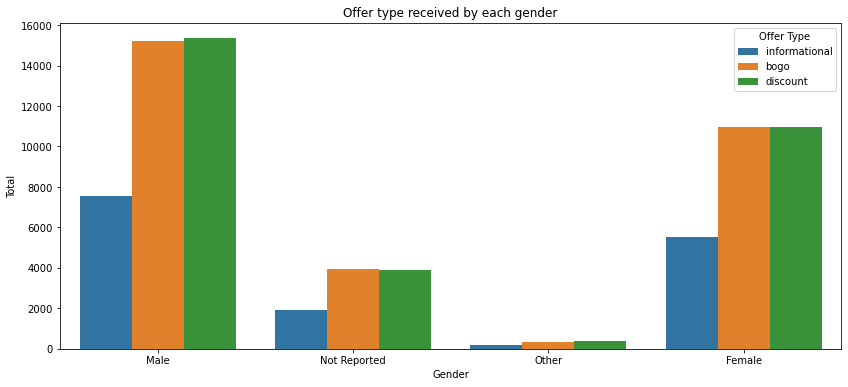

In [44]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="gender", hue="offer_type", data= merged_df)
plt.title('Offer type received by each gender')
plt.ylabel('Total')
xlabels = ['Male', 'Not Reported','Other','Female']
g.set_xticklabels(xlabels)
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

### All three offers are distributed in a similar way among all genders. The most popular ones being BOGO and Discount.

## 7. Explore event by different gender groups

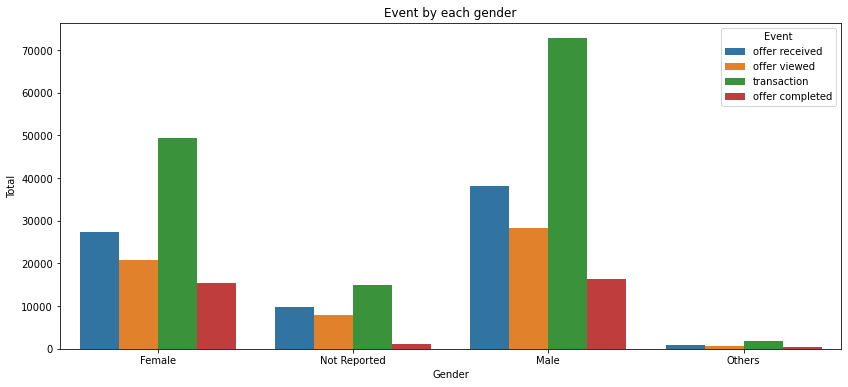

In [53]:
#Load event gender data
event_gender_df = pd.read_pickle('event_gender_data.pkl')
plt.figure(figsize=(14, 6))
g = sns.countplot(x="gender", hue="event", data= event_gender_df)
plt.title('Event by each gender')
plt.ylabel('Total')
xlabels = ['Female', 'Not Reported','Male','Others']
g.set_xticklabels(xlabels)
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Event')
plt.show();

### Events performed by each gender group is in similar pattern. All gender group perform higher transactions than the offer received. Significant number of offers received are completed.